### importing necessary modules

In [187]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### converting scikitlearn database into pandas df

In [188]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### converting df into numpy array and getting the target attr of sklearn dataset

In [189]:
X = df.values
Y=data.target

In [190]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### splitting the numpy arr into train and test cases

In [191]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [192]:
X_train.shape

(404, 13)

In [193]:
Y_train.shape

(404,)

In [194]:
#converting the rank1 matrices( one above ) into definite column matrix
Y_train=Y_train.reshape([Y_train.shape[0],1])
Y_train.shape #definite column matrix

(404, 1)

### adding Xo = 1 404*14 matrix

In [195]:
x=[1 for i in range(X_train.shape[0])]
X_train = np.insert(X_train,0,x,axis=1) 

In [196]:
x=[1 for i in range(X_test.shape[0])]
X_test = np.insert(X_test,0,x,axis=1) 

In [197]:
params = np.zeros((X_train.shape[1],1))
params.shape

(14, 1)

In [198]:
I = np.linalg.inv((X_train.T)@X_train)

In [199]:
#params = I@X_train.T@Y_train
params = np.zeros((X_train.shape[1],1))

In [200]:
def Mse(Y_prid,Y_true):
    dif = Y_prid - Y_true
    dif = dif**2
    dif = dif.sum()
    return dif/(2*Y_prid.shape[0])

In [201]:
Mse(X_train@params,Y_train)

297.274900990099

In [202]:
Mse(X_test@params,Y_test)

29714.110000000008

In [203]:
def gradient_descent(params,X,Y,learn_rate,num_itr):
    Y_pred = X@params
    J_history = np.zeros((num_itr,1))
    
    
    for i in range(num_itr):
        J_history[i] = Mse(Y_pred,Y)
        params = params - ((X.T@(Y_pred-Y))*learn_rate/X.shape[0])
        Y_pred = X@params
    plt.plot(range(num_itr),J_history,'g')
    plt.title("Cost vs num_itr")
    plt.xlabel("num_itr")
    plt.ylabel("Cost")
    sns.despine()
    plt.show()
    return params
    
    

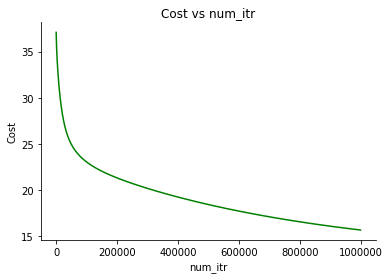

In [205]:
params = gradient_descent(params,X_train,Y_train,0.000001,1000000)